# Test the utilisation and power data 
to see if they are stationary,i.e., not dependent on time \
Mean can be used if the time series data is stationary

https://machinelearningmastery.com/time-series-data-stationary-python/

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

# plt.rcParams['figure.dpi'] = 150

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 12

plt.style.use('tableau-colorblind10')

In [3]:
def read_and_transform(url):
    df = pd.read_csv(url)
    df.timestamp = [datetime.strptime(time, "%Y/%m/%d %H:%M:%S.%f") for time in df.timestamp]
    start_time = df.iloc[0]['timestamp']
    df['timestamp_label'] = [str((time - start_time).total_seconds()) for time in df.timestamp]
    return df

In [4]:
def plot_gpu_util(df, title=""):
    fig, ax = plt.subplots()
    ax = plt.plot(df['timestamp_label'],df[" utilization.gpu [%]"], label="gpu")
    ax = plt.plot(df['timestamp_label'],df[" utilization.memory [%]"], label="memory" )
    plt.legend()
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    plt.xlabel('time (s)')
    plt.ylabel('(%)')
    plt.title(title)
    plt.show()

In [24]:
url = "nvidia/nvidia_power_MNLI_64_128.csv"
df = read_and_transform(url)
# print(df.columns)
# plot_gpu_util(df, "Combined utilisation")
# df_gpu1 = df.iloc[::2]
# df_gpu2 = df.iloc[1::2]
# plot_gpu_util(df_gpu1, "GPU 1")
# plot_gpu_util(df_gpu2, "GPU 2")

In [25]:
df.set_index('timestamp', inplace=True)

In [26]:
df_gpu1 = df.iloc[::2]
df_gpu2 = df.iloc[1::2]

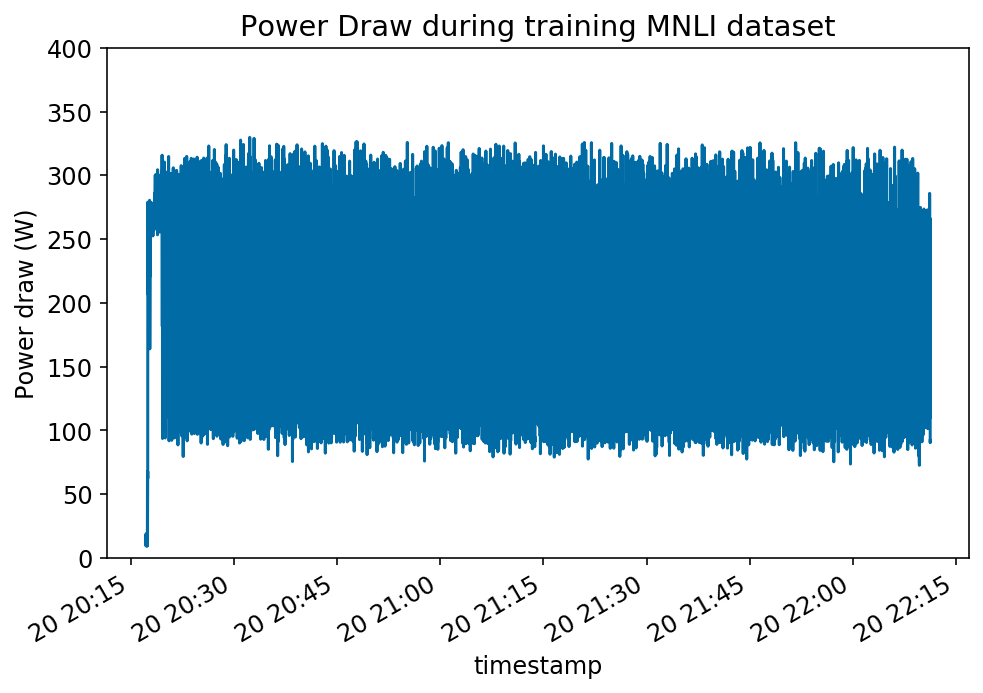

In [46]:
ax = df[' power.draw [W]'].plot(figsize=(7,5))
ax.set_title("Power Draw during training MNLI dataset")
ax.set_ylabel("Power Draw (W)")

ax.set_ylim(0,400)
plt.tight_layout()
ax.figure.savefig('viz/powerdrawMNLI.png',dpi=300)

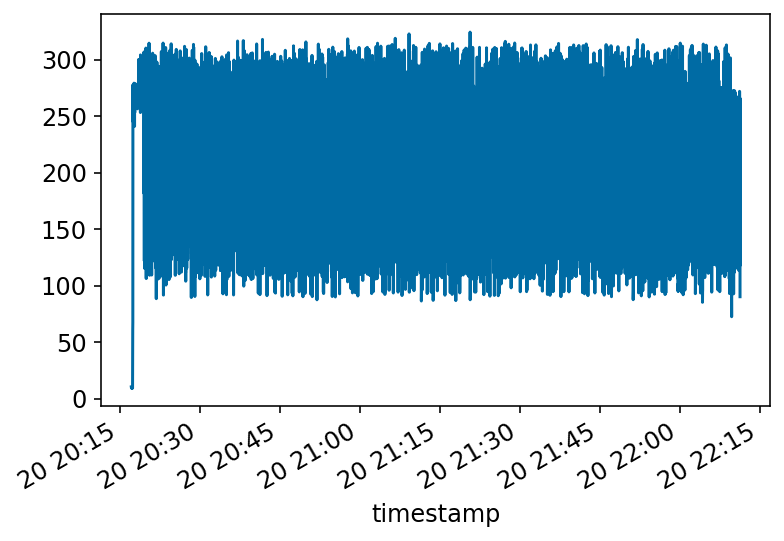

In [47]:
df_gpu1[' power.draw [W]'].plot()

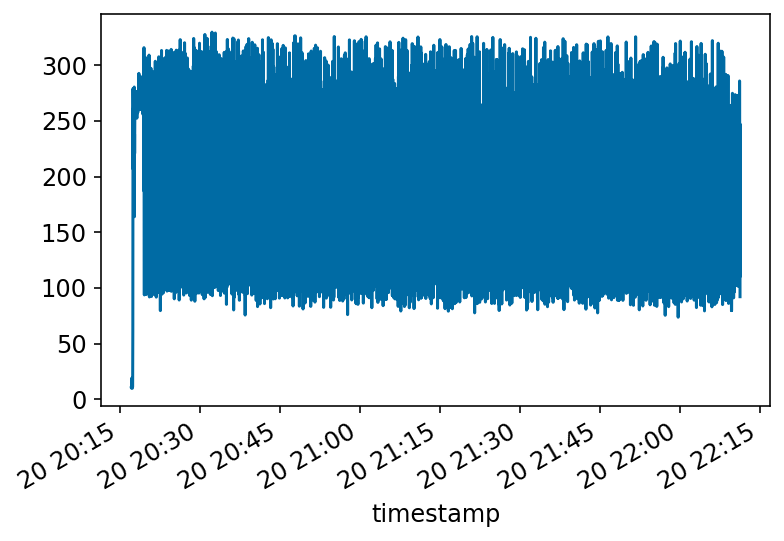

In [48]:
df_gpu2[' power.draw [W]'].plot()

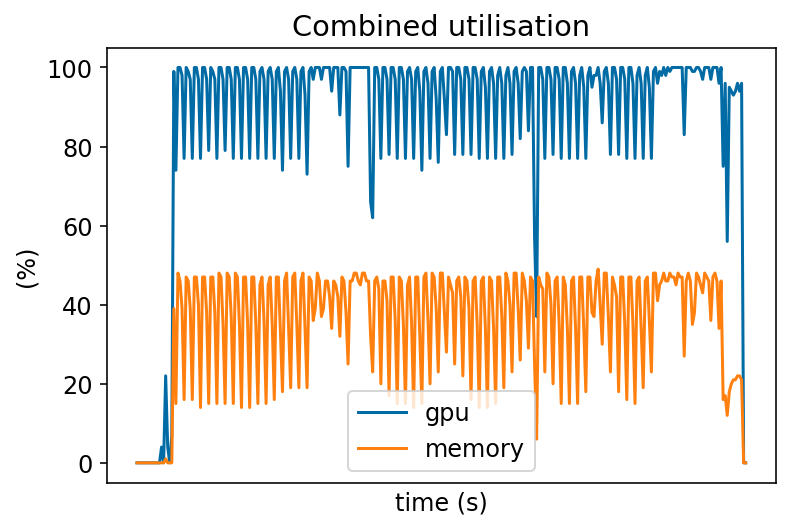

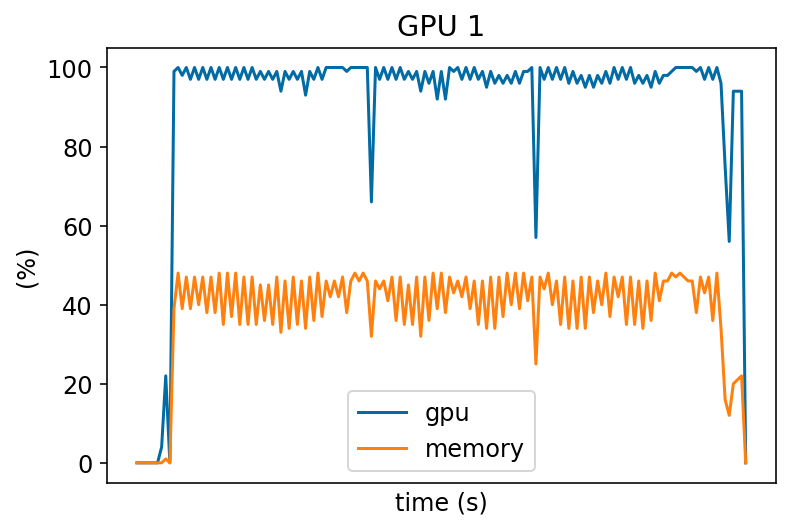

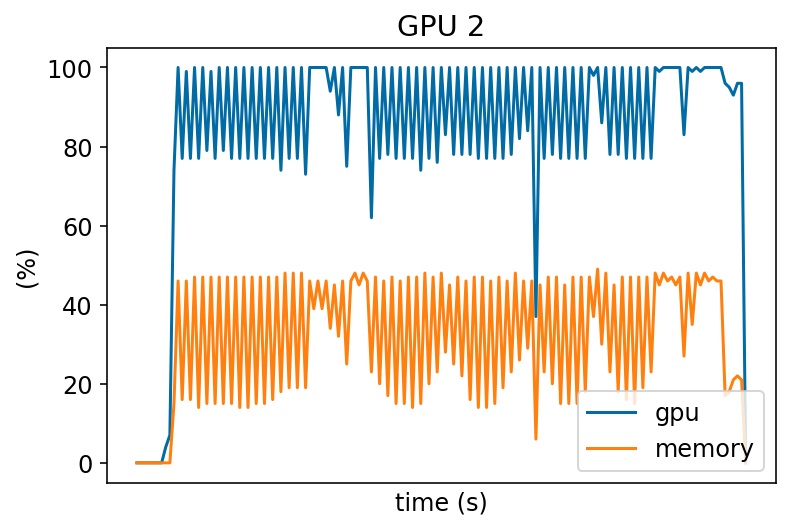

In [44]:
url = "nvidia/nvidia_power_CoLA_64_128.csv"
df_cola = read_and_transform(url)
# print(df.columns)
plot_gpu_util(df_cola, "Combined utilisation")
df_cola_gpu1 = df_cola.iloc[::2]
df_cola_gpu2 = df_cola.iloc[1::2]
plot_gpu_util(df_cola_gpu1, "GPU 1")
plot_gpu_util(df_cola_gpu2, "GPU 2")

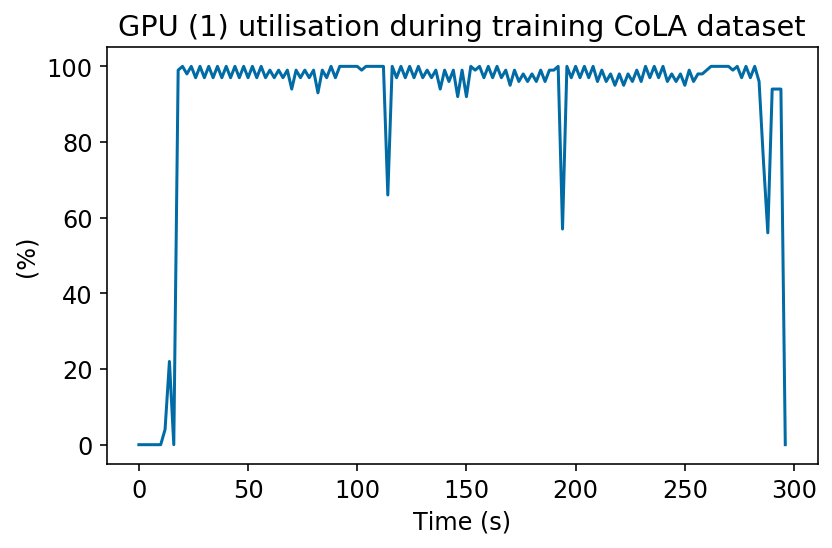

In [67]:
ax = df_cola_gpu1[' utilization.gpu [%]'].plot()
ax.set_title("GPU (1) utilisation during training CoLA dataset")
ax.set_ylabel("(%)")
ax.set_xlabel("Time (s)")
plt.tight_layout()
ax.figure.savefig('viz/gpu1utilCoLA.png',dpi=300)

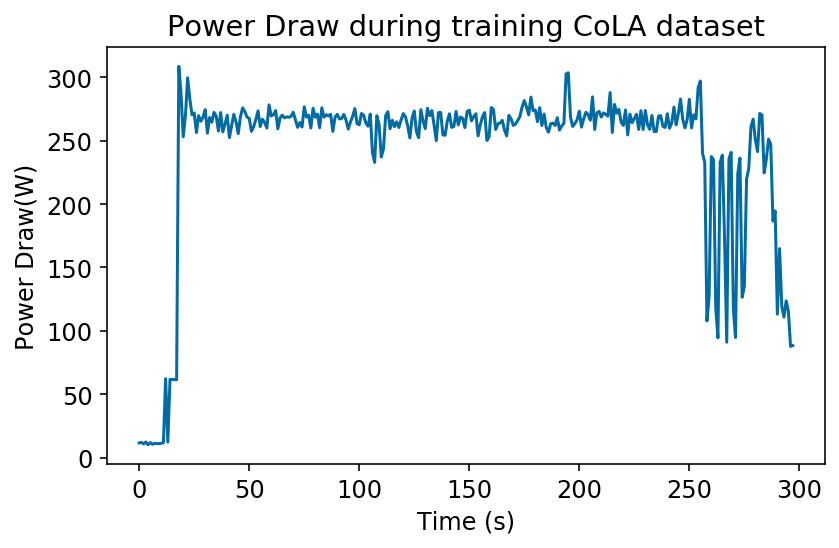

In [58]:
ax = df_cola[' power.draw [W]'].plot()
ax.set_title("Power Draw during training CoLA dataset")
ax.set_ylabel("Power Draw(W)")
ax.set_xlabel("Time (s)")
plt.tight_layout()
ax.figure.savefig('viz/powerdrawCoLA.png',dpi=300)

## checking if time-series is stationary

Augmented Dickey-Fuller test

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [32]:
from statsmodels.tsa.stattools import adfuller
def testStationary(series):
    X = series.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [34]:
testStationary(df[" utilization.gpu [%]"])

ADF Statistic: -24.480039
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [35]:
testStationary(df[" utilization.memory [%]"])

ADF Statistic: -12.875204
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [36]:
testStationary(df[" memory.used [MiB]"])

ADF Statistic: -22.214246
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [37]:
testStationary(df[" power.draw [W]"])

ADF Statistic: -15.247266
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [38]:
testStationary(df[' temperature.gpu'])

ADF Statistic: -22.625187
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


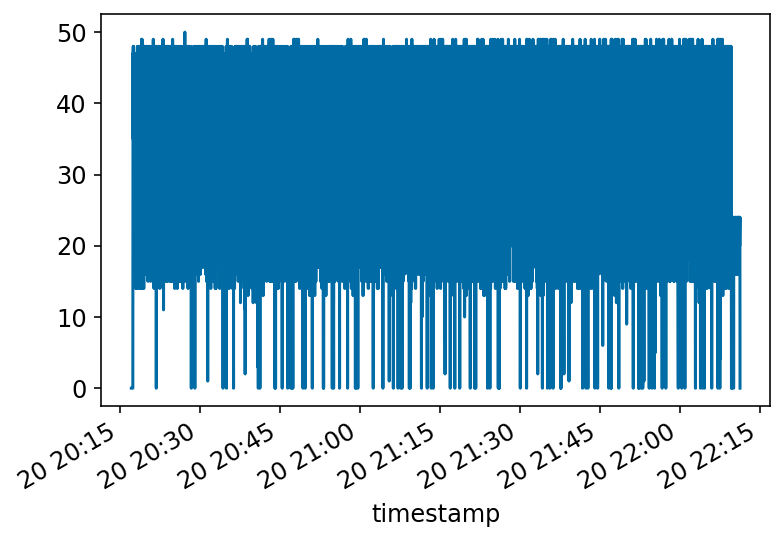

In [39]:
df[" utilization.memory [%]"].plot()

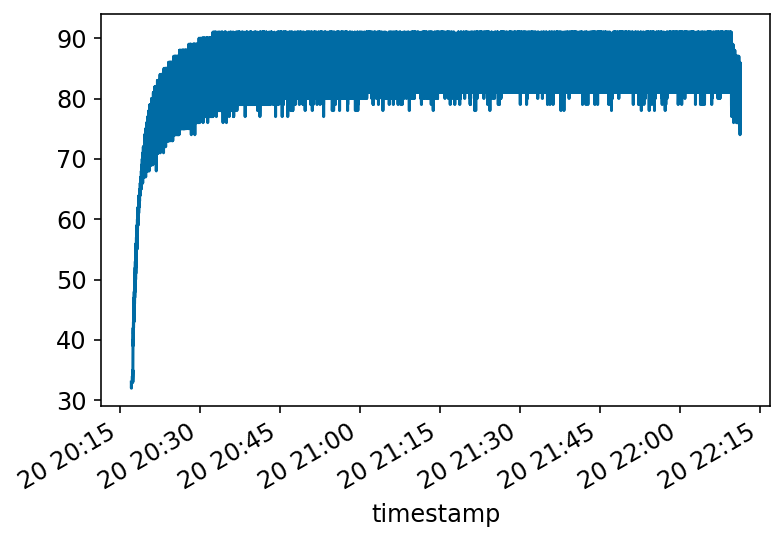

In [40]:
df[" temperature.gpu"].plot()

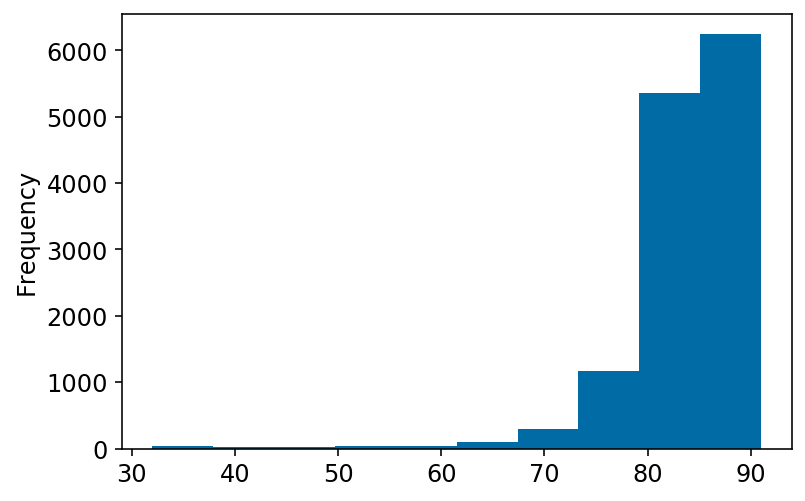

In [41]:
df[" temperature.gpu"].plot.hist()

In [42]:
df.columns

Index([' utilization.gpu [%]', ' utilization.memory [%]',
       ' memory.total [MiB]', ' memory.used [MiB]', ' memory.free [MiB]',
       ' temperature.gpu', ' power.draw [W]', ' pstate', 'timestamp_label'],
      dtype='object')

In [68]:
testStationary(df_cola_gpu1[" utilization.gpu [%]"])

ADF Statistic: -4.630286
p-value: 0.000114
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


In [66]:
df_cola_gpu2[" utilization.gpu [%]"].mean()

84.67785234899328

In [65]:
df_cola_gpu1[" utilization.gpu [%]"].mean()

90.73825503355705